# Google Play Store apps and reviews

<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo" width="600"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><a href='https://github.com/Gbofrc/Google-Play-Store-apps-and-reviews/raw/main/apps.csv'>apps.csv</a> contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><a href='https://github.com/Gbofrc/Google-Play-Store-apps-and-reviews/raw/main/user_reviews.csv'>users_reviews.csv</a>: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>





### Import, read, first look

In [1]:
# Reading the datasets

import pandas as pd

apps = pd.read_csv('https://github.com/Gbofrc/Google-Play-Store-apps-and-reviews/raw/main/apps.csv')
users = pd.read_csv('https://github.com/Gbofrc/Google-Play-Store-apps-and-reviews/raw/main/user_reviews.csv')

In [2]:
# view of the first three rows of apps.csv
apps.sample(3)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2172,2768,Etsy: Handmade & Vintage Goods,SHOPPING,4.3,95520,15.0,"10,000,000+",Free,0,Teen,Shopping,"August 3, 2018",5.3.1,4.1 and up
5355,6363,Read it easy for BK,LIFESTYLE,5.0,1,3.2,50+,Free,0,Everyone,Lifestyle,"July 15, 2018",1.2,4.1 and up
8059,9179,EB-Link,BUSINESS,4.8,6,11.0,100+,Free,0,Everyone,Business,"June 7, 2018",1.2.7,4.2 and up


In [3]:
# view of the first three rows of users.csv
users.sample(3)

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4693,Agar.io,I hope arena freezing already fixed working le...,Positive,0.1,0.2
59557,Hairstyles step by step,I like,Neutral,0.0,0.0
22242,Calorie Counter - MyNetDiary,Help keep track,Neutral,0.0,0.0


In [4]:
# The shape of the apps. There are 9559 rows, wich row an observation, with 14 columns, each column a distinct variable
apps.shape

(9659, 14)

In [5]:
# The shape of the users. There are 9559 rows, wich row an observation, with 5 columns, each column a distinct variable
users.shape

(64295, 5)

In [6]:
# There are no duplicates entries in the apps.csv
print(apps.duplicated().value_counts())

False    9659
dtype: int64


In [7]:
# Only Rating and Size columns are floating type, all the others are strings
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [8]:
# All columns are the string type
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
# Detecting chars to remove
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [10]:
# Detecting chars to remove
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### Cleaning

<p>By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters due to the way the numbers have been represented. The <code>unique()</code> method confirms it</p>

<p>This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p><p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>
<p>It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the <code>info()</code> method to acheive this.</p>

In [11]:
# We want the Price and Installs columns to be the float type
chars_to_remove = ['+', ',', '$']
columns_to_clean = ['Installs', 'Price']

for column in columns_to_clean:
    for char in chars_to_remove:
        apps[column] = apps[column].apply(lambda x: x.replace(char, ""))
        
apps.sample(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2046,2589,Text free - Free Text + Call,SOCIAL,4.3,315441,NaN,10000000,Free,0,Everyone,Social,"July 26, 2018",Varies with device,Varies with device
4438,5398,The PCH App,LIFESTYLE,4.5,234971,81.0,1000000,Free,0,Everyone,Lifestyle,"July 25, 2018",2.8.7.78579,4.4 and up
8758,9912,Intra- and extra-EU trade data,FINANCE,NaN,1,2.5,100,Free,0,Everyone,Finance,"December 16, 2015",1.0.5,4.0 and up
4541,5506,AQ Ria Retail,FAMILY,5.0,4,52.0,50,Free,0,Everyone,Education,"April 3, 2018",1.1,4.1 and up
7206,8284,DC Metro,MAPS_AND_NAVIGATION,3.4,59,1.3,10000,Free,0,Everyone,Maps & Navigation,"January 26, 2015",1,1.5 and up


In [12]:
# After characters removed, we want to change the type of Installs and Price columns

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype('float')

# Convert Price to float data type
apps['Price'] = apps['Price'].astype('float')

# Checking dtype
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


### Exploring

<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [13]:
# checking categories into dataset
print(apps['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [14]:
print('This dataset has ' + str(len(apps['Category'].unique())) + ' unique categories')

This dataset has 33 unique categories


In [15]:
# how many apps in each category
apps['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [16]:
# Viewing categories in a bar graph

# pip install dash - if plotly is not installed

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

data = [go.Bar(
        x = apps['Category'].value_counts().index, # index = category name
        y = apps['Category'].value_counts().values, # value = count
)]

plotly.offline.iplot(data)

In [17]:
# Exploring Ratings

apps['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [18]:
# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': apps['Rating'].mean(),
              'y0': 0,
              'x1': apps['Rating'].mean(),
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

### Size and price of an app

<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>

How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?
Do users really care about system-heavy apps or do they prefer light-weighted apps?
Does the price of an app affect its rating?
Do users always prefer free apps over paid apps?
We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.



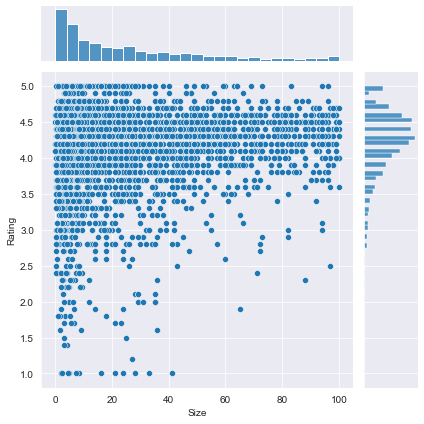

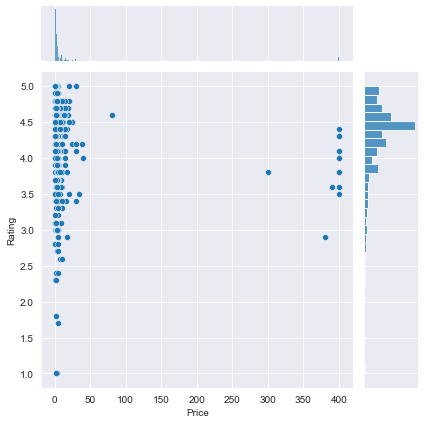

In [19]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_not_null = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_not_null.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plot1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_not_null[apps_not_null['Type'] == 'Paid']

# Plot price vs. rating
plot2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### Relation between app category and app price¶
So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to 80 dollars! All game apps are reasonably priced below 20 dollars.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


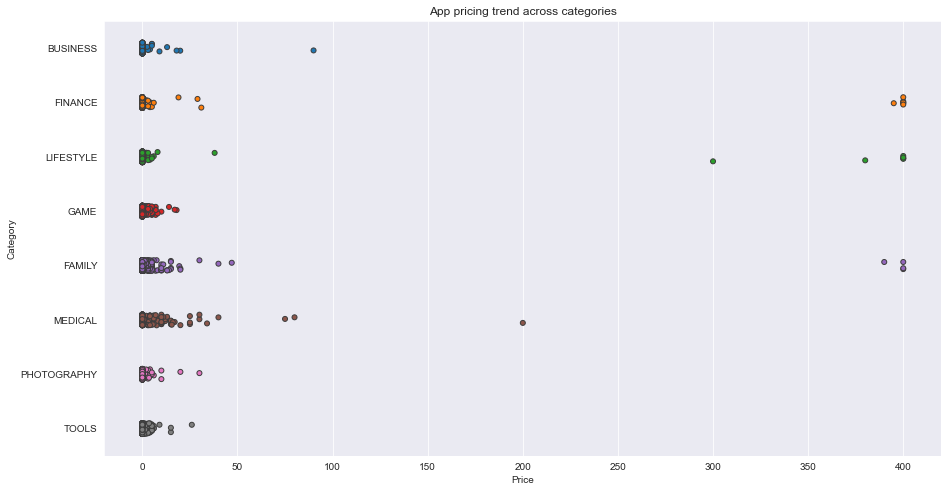

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

### Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

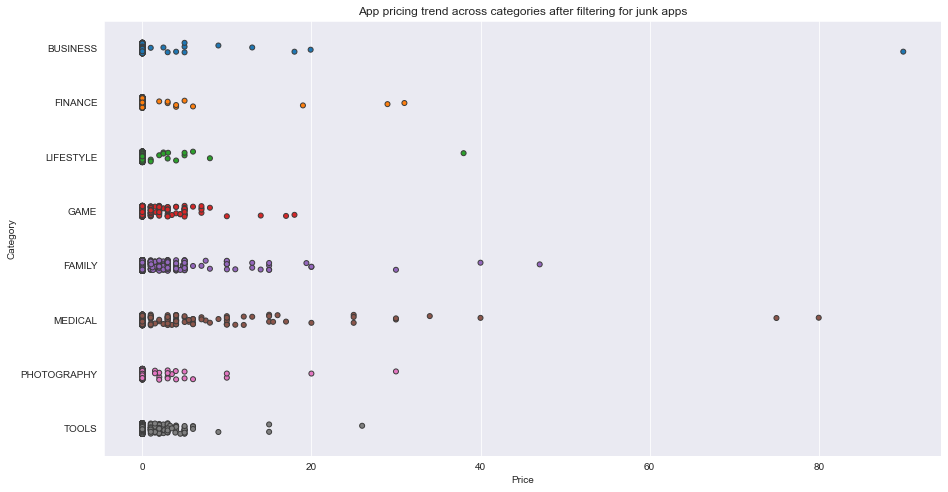

In [21]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [23]:
box0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

box1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [box0, box1]
plotly.offline.iplot({'data': data, 'layout': layout})

### Sentiment analysis of user reviews¶
Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

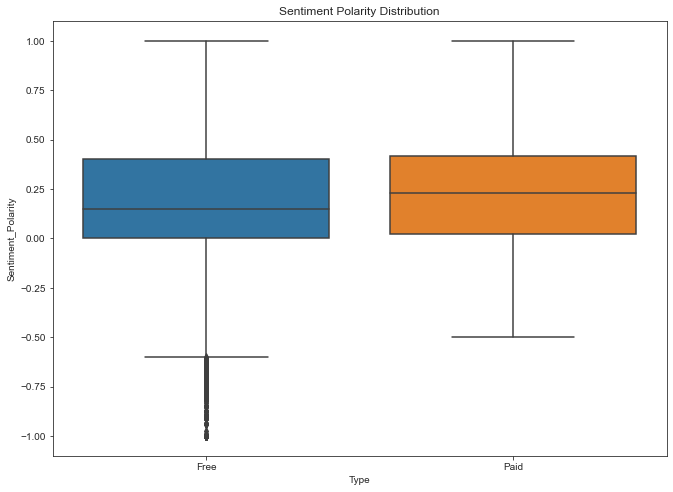

In [24]:
# Join the two dataframes
merged = pd.merge(apps, users, on = "App")

# Drop NA values from Sentiment and Review columns
merged = merged.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged)
ax.set_title('Sentiment Polarity Distribution')